In [1]:
import sklearn
import pandas as pd
import numpy as np

##### display first 5 rows of the dataframe

In [2]:
pumpkins = pd.read_csv(r'/Users/saniaji/Desktop/ArewaDS/ADSA-Machine-Learning/Pumpkins Data/US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


##### data frame info

In [4]:
pumpkins.info

<bound method DataFrame.info of       City Name Type        Package      Variety Sub Variety  Grade     Date  \
0     BALTIMORE  NaN   24 inch bins          NaN         NaN    NaN  4/29/17   
1     BALTIMORE  NaN   24 inch bins          NaN         NaN    NaN   5/6/17   
2     BALTIMORE  NaN   24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3     BALTIMORE  NaN   24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4     BALTIMORE  NaN   24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   
...         ...  ...            ...          ...         ...    ...      ...   
1752  ST. LOUIS  NaN  22 lb cartons    MINIATURE   FLAT TYPE    NaN  9/30/16   
1753  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/26/16   
1754  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/27/16   
1755  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/28/16   
1756  ST. LOUIS  NaN   36 inch bins    MINIATURE  ROUND TYPE    NaN  9/29/16   

      L

##### filtering the data we want and fitting

In [5]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

##### filtered data

In [6]:
new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

##### Side-by-Side Visualization
##### 1. Create such a grid by instantiating a PairGrid, using our pumpkin data new_pumpkins, followed by calling map():

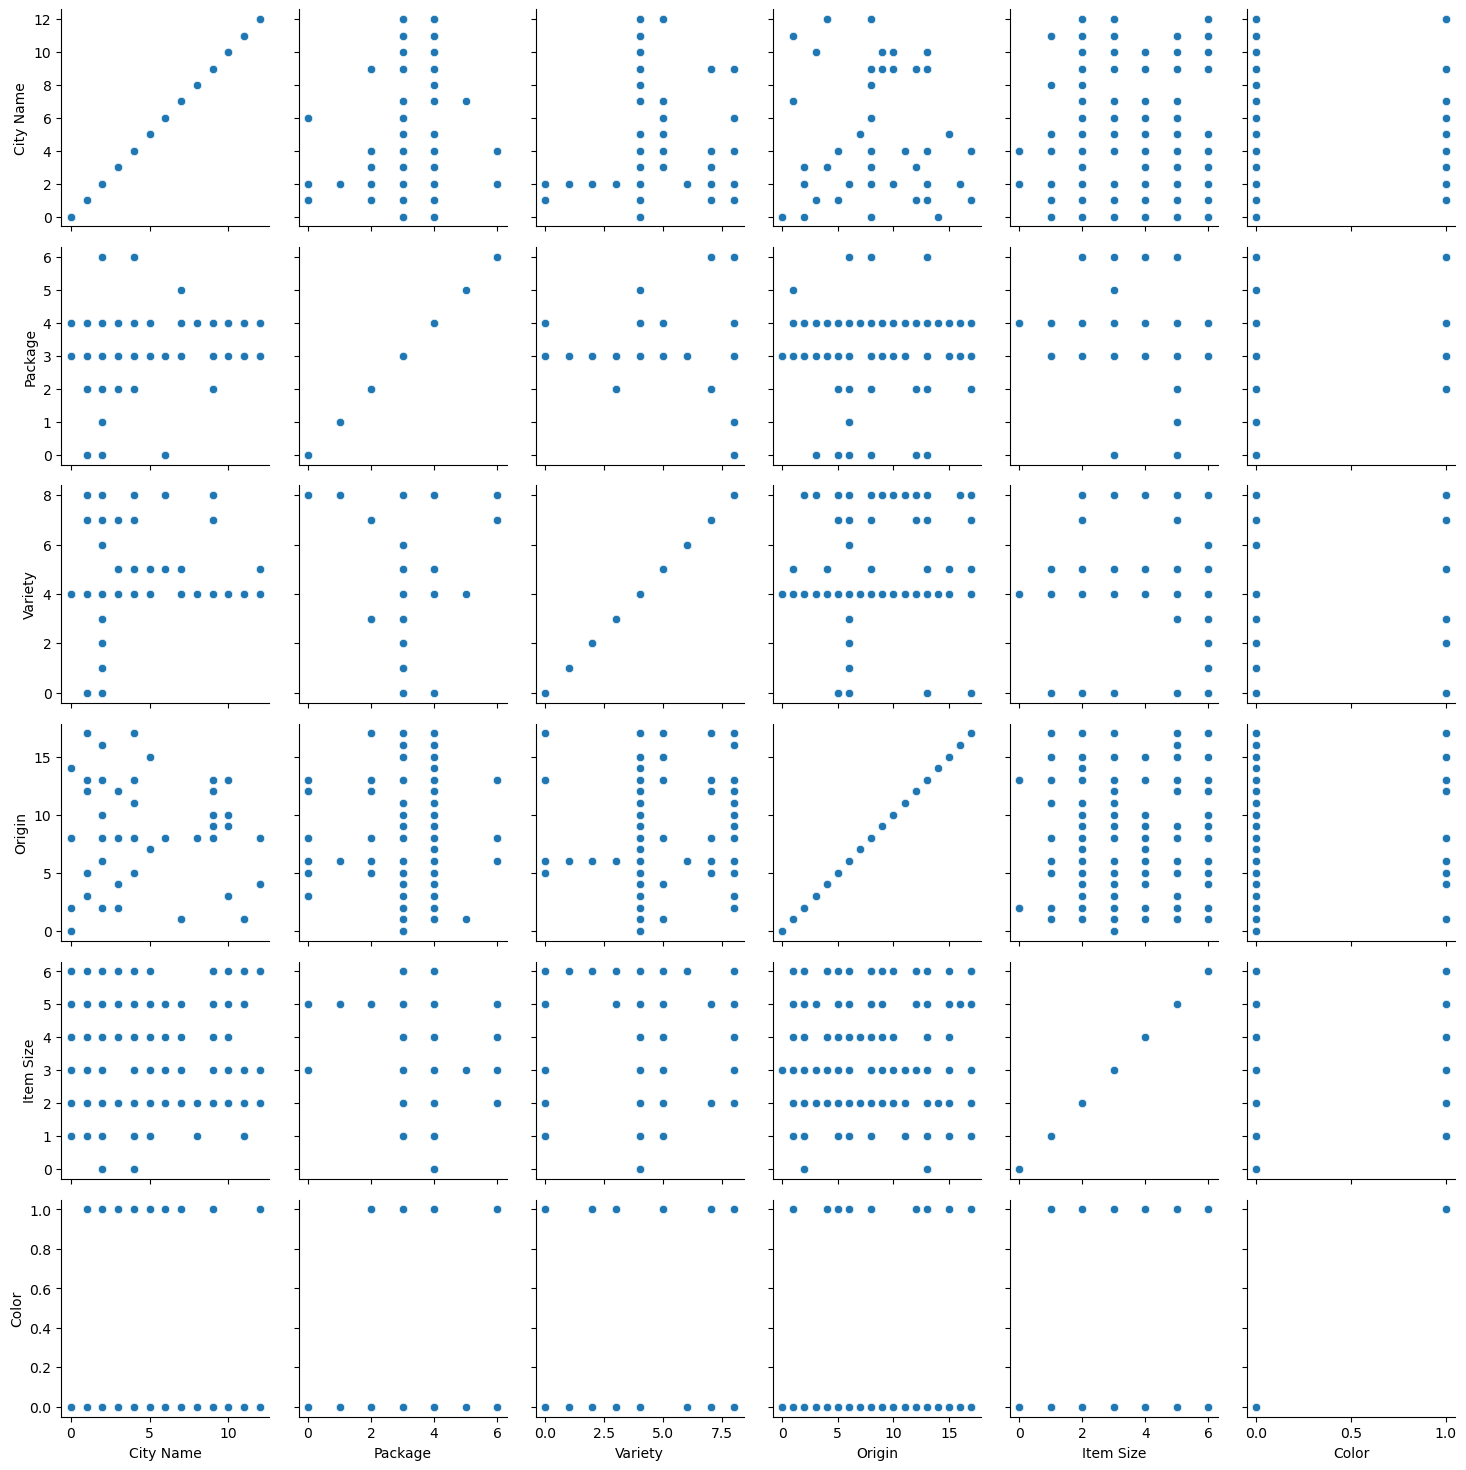

In [7]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

##### Use a swarm plot
##### Try a 'swarm' plot to show the distribution of values:

/Users/saniaji/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/saniaji/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

/Users/saniaji/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/saniaji/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


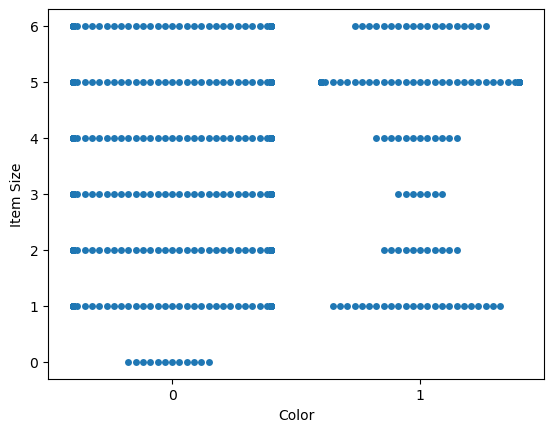

In [8]:
import seaborn as sns

sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

##### Violin plot
##### As parameters x=Color, kind="violin" and call catplot():

/Users/saniaji/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


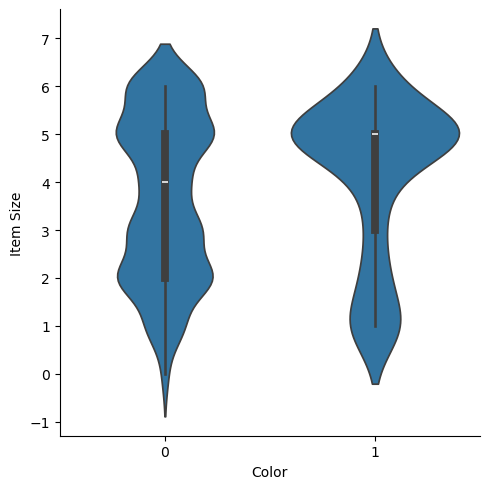

In [9]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

#####  Model Building
##### Select the variables you want to use in your classification model and split the training and test sets calling train_test_split():

In [10]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Now you can train your model, by calling fit() with your training data, and print out its result:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


##### To use a confusion metrics, call confusion_matrix():

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

In [16]:
#In Scikit-learn, confusion matrices Rows (axis 0) are actual labels and columns (axis 1) are predicted labels.

 #   0	1
# 0	 TN	FP
# 1	 FN	TP

##### Visualize the ROC curve of this model


<Axes: >

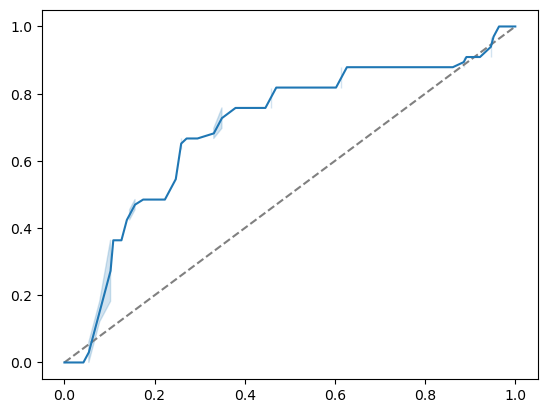

In [14]:
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Plot ROC curve
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
sns.lineplot(x=fpr, y=tpr)